## 2.3.3. 선형 모델
### 회귀의 선형 모델

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

w[0]: 0.393906  b: -0.031804


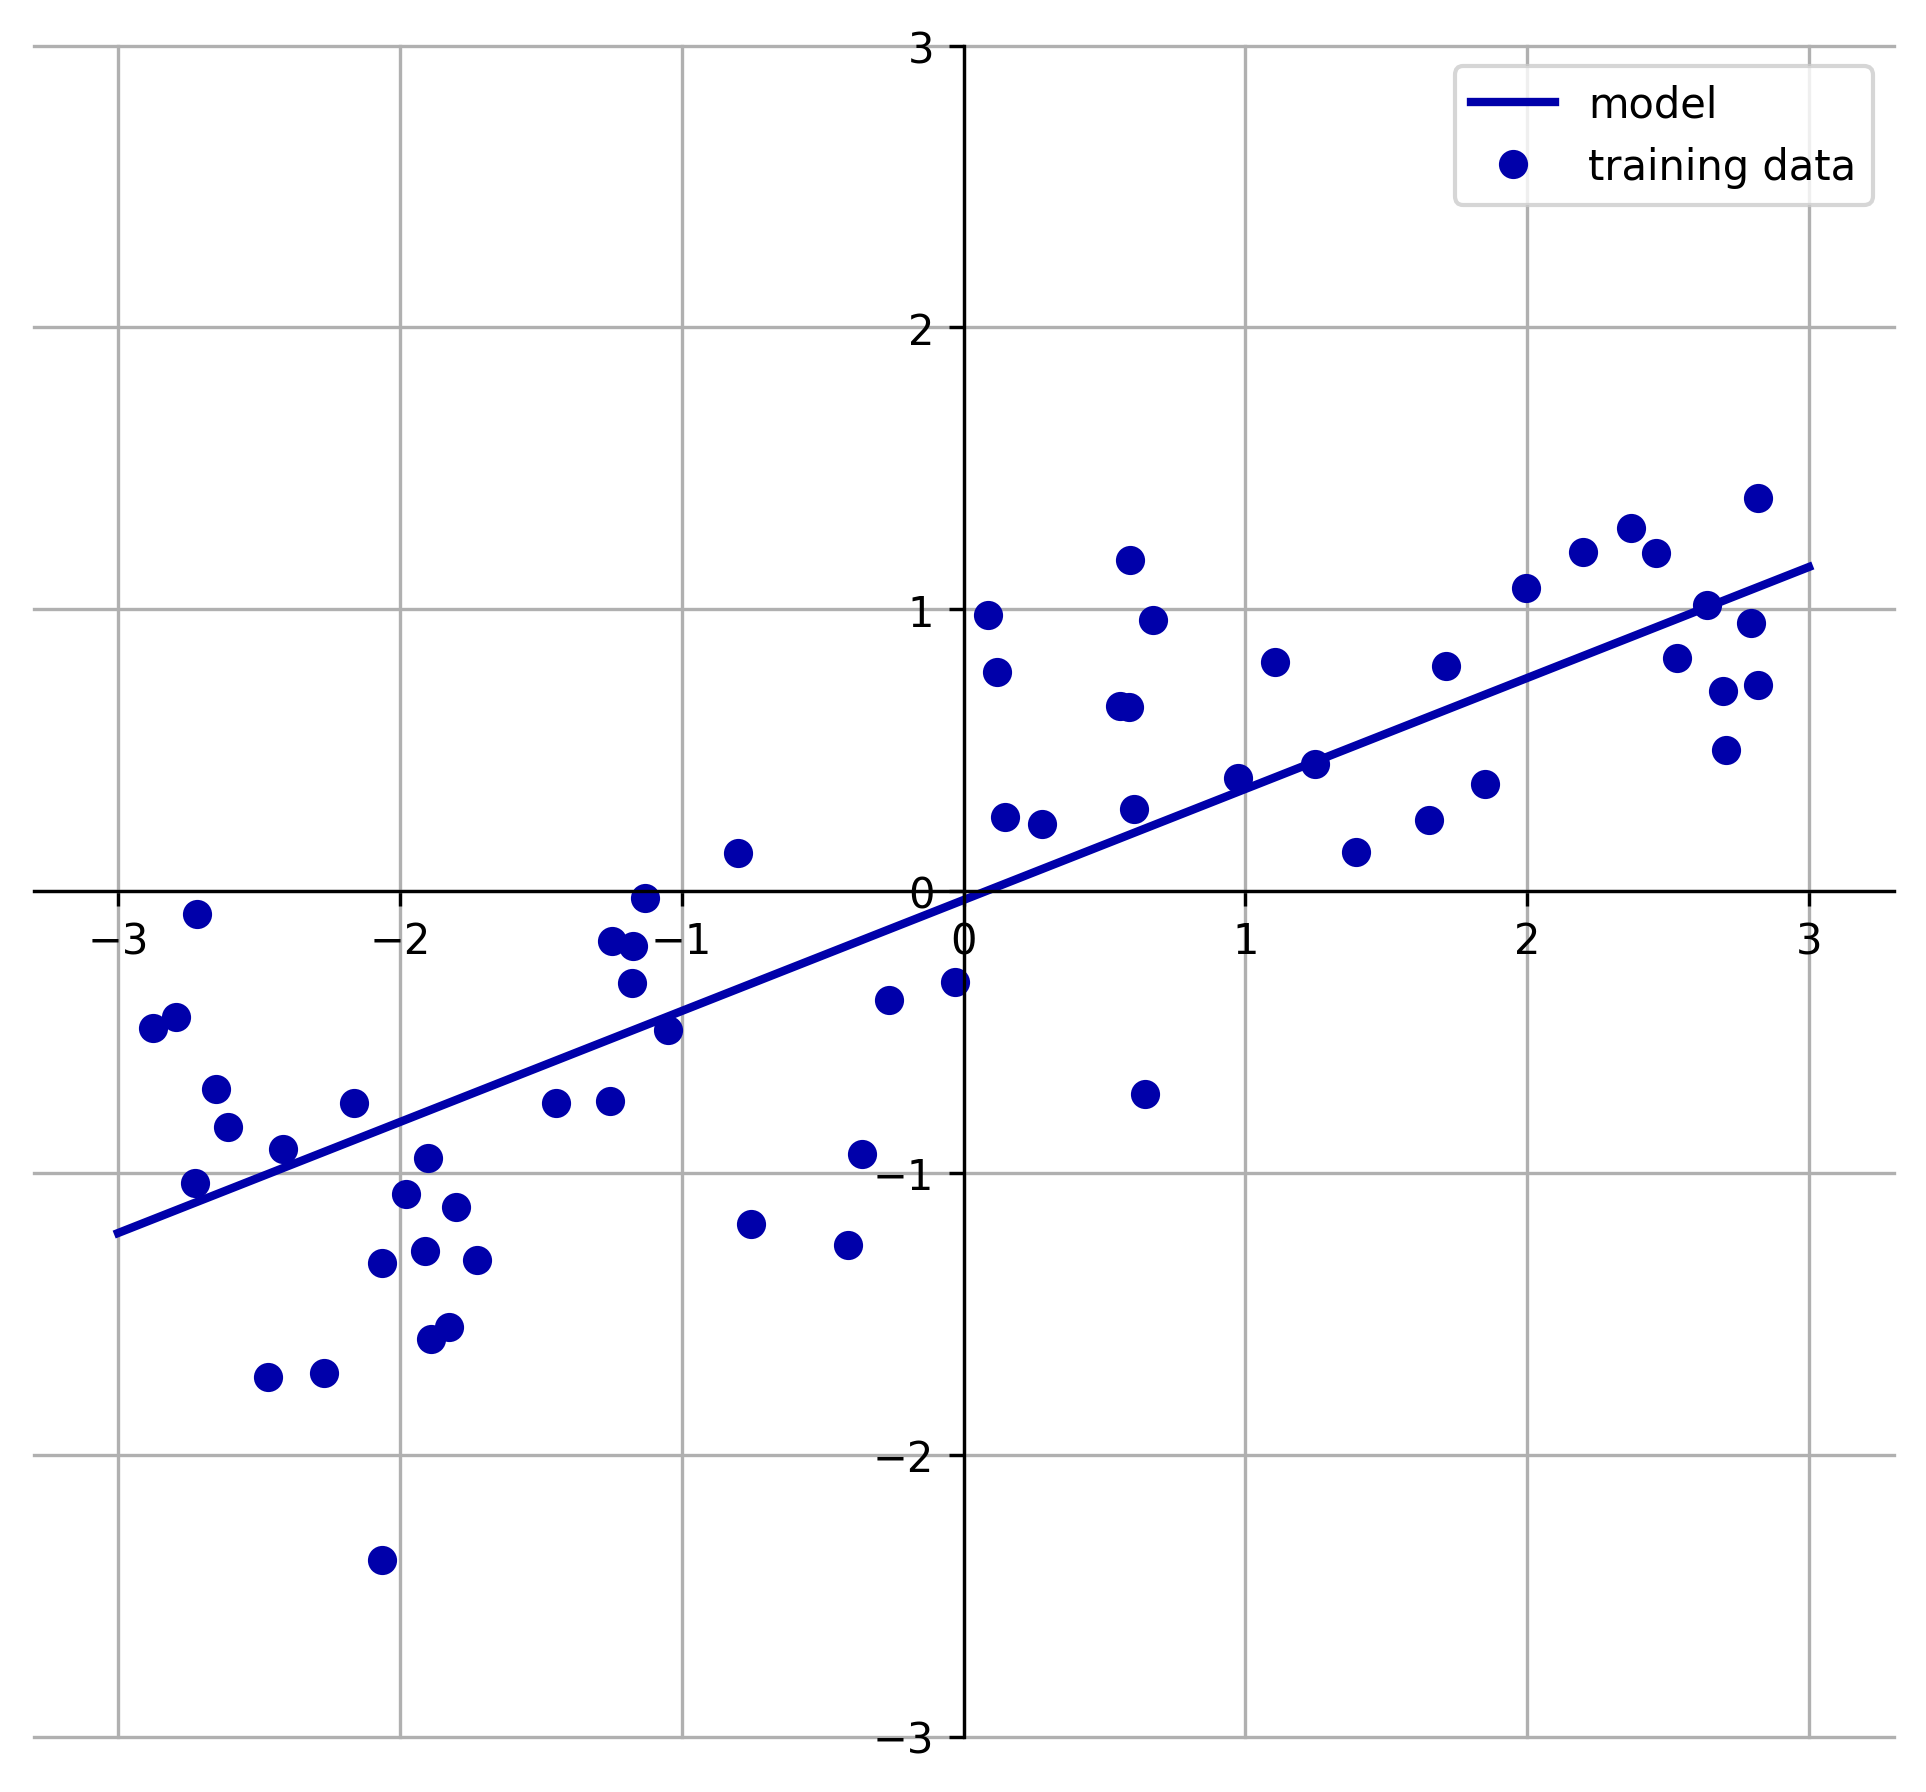

In [3]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_: [ 0.394]
lr.intercept_:-0.031804343026759746


In [10]:
print("훈련 세트 스코어: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 스코어: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 스코어: 0.67
테스트 세트 스코어: 0.66


In [13]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [14]:
print("훈련 세트 스코어: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 스코어: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 스코어: 0.95
테스트 세트 스코어: 0.61


### 릿지 회귀

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("트레이닝 세트 스코어: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 스코어: {:.2f}".format(ridge.score(X_test, y_test)))

트레이닝 세트 스코어: 0.89
테스트 세트 스코어: 0.75


In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("트레이닝 세트 스코어: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 스코어: {:.2f}".format(ridge10.score(X_test, y_test)))

트레이닝 세트 스코어: 0.79
테스트 세트 스코어: 0.64


In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("트레이닝 세트 스코어: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 스코어: {:.2f}".format(ridge01.score(X_test, y_test)))

트레이닝 세트 스코어: 0.93
테스트 세트 스코어: 0.77


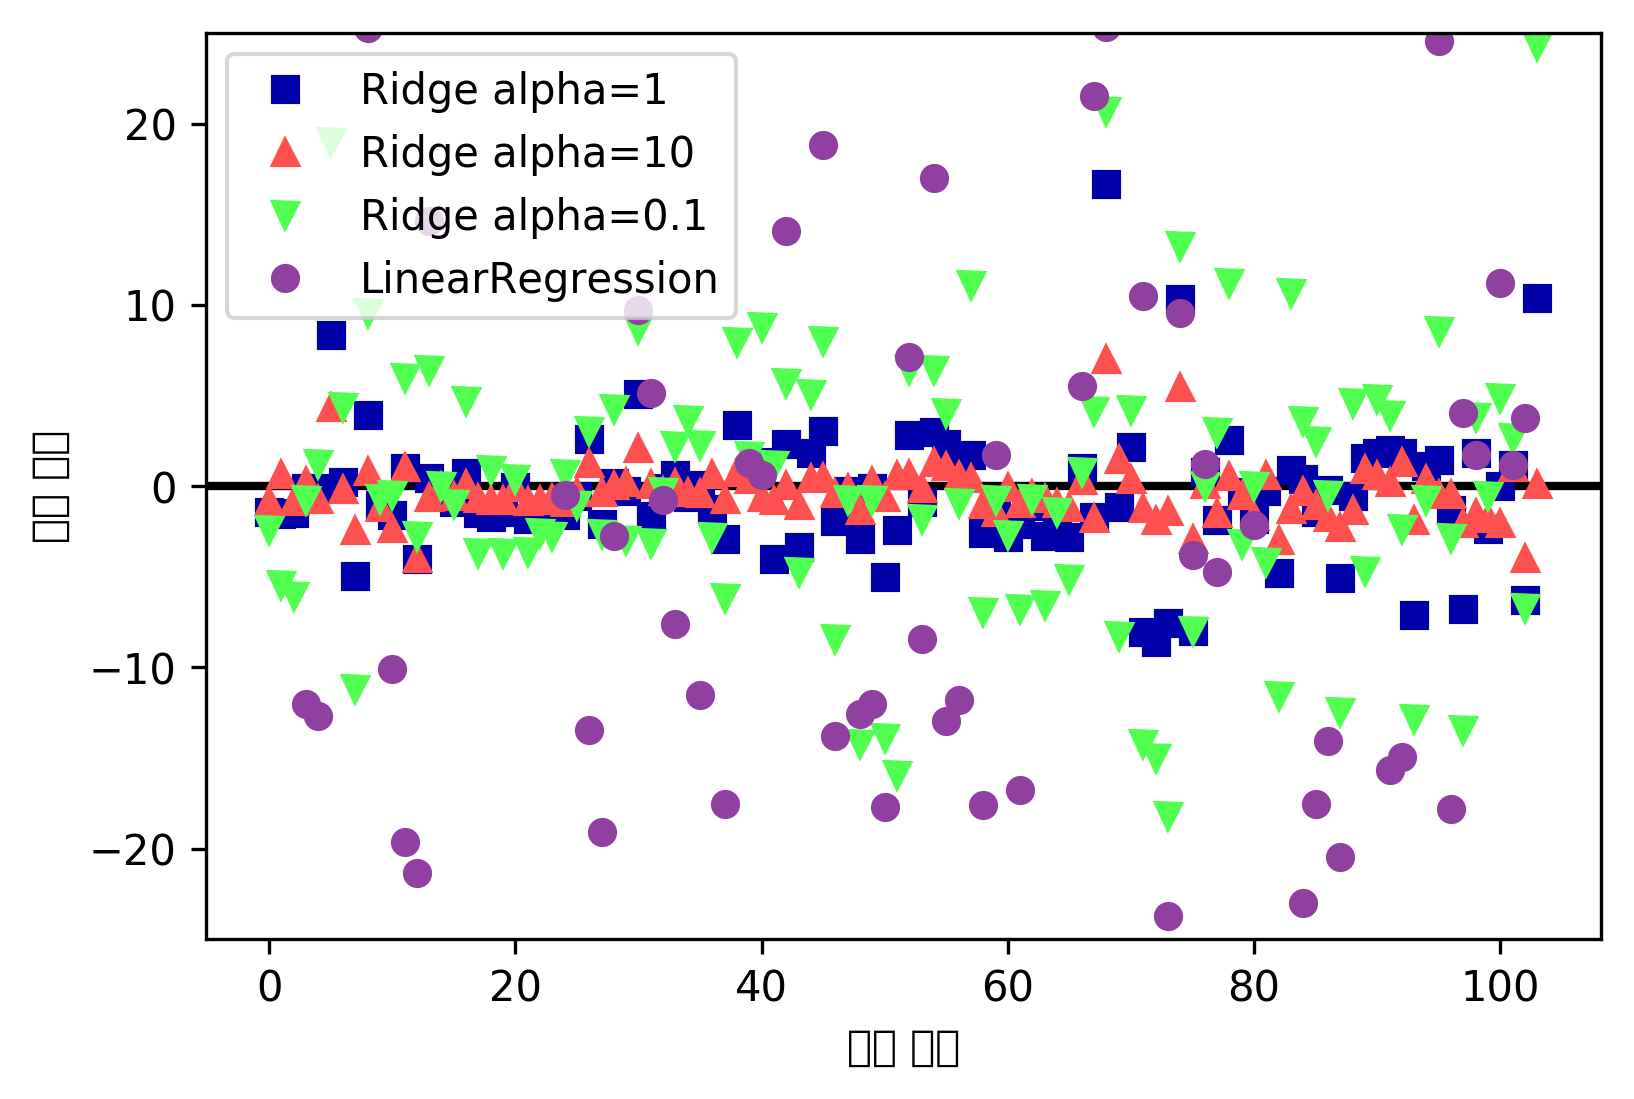

In [20]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

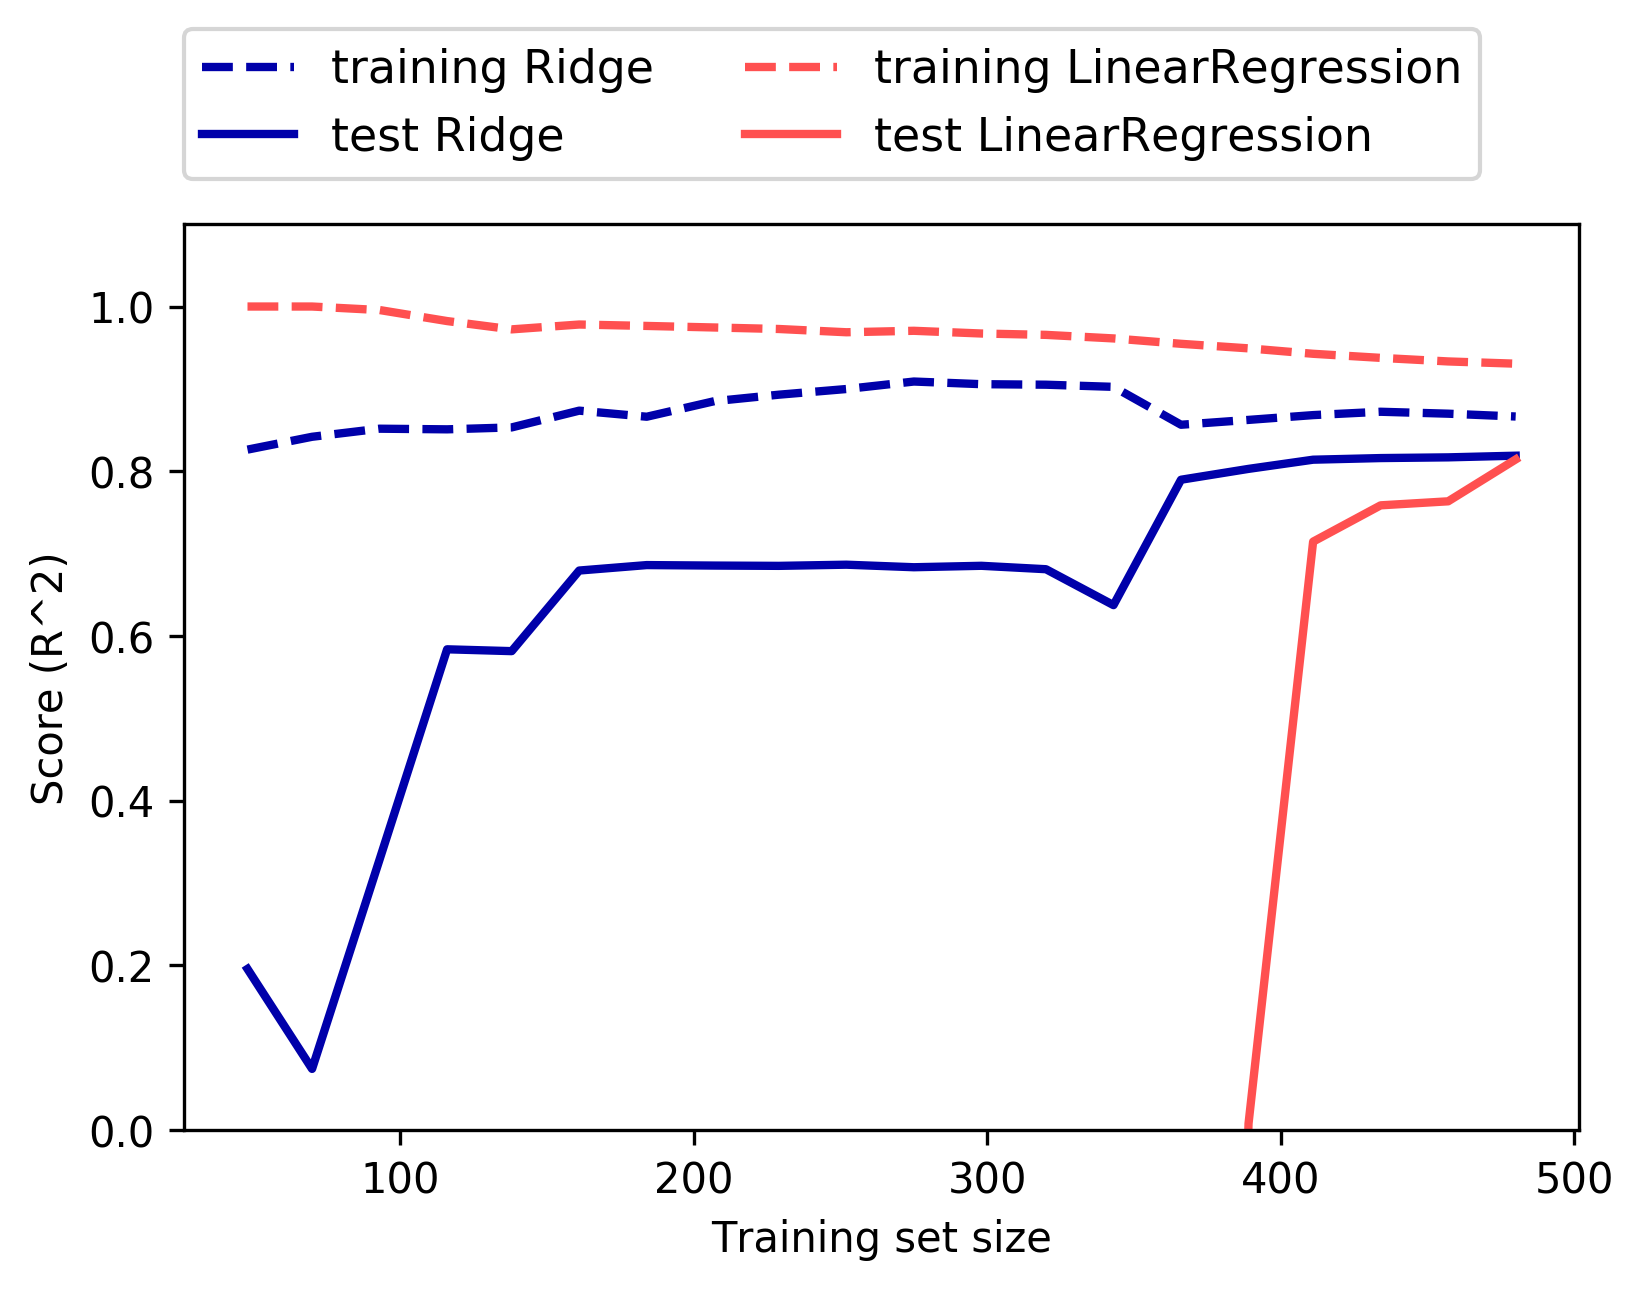

In [21]:
mglearn.plots.plot_ridge_n_samples()

### 라쏘

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("학습 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso.coef_ != 0)))

학습 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성 수: 4


In [28]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성 수: 33


In [29]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성 수: 94


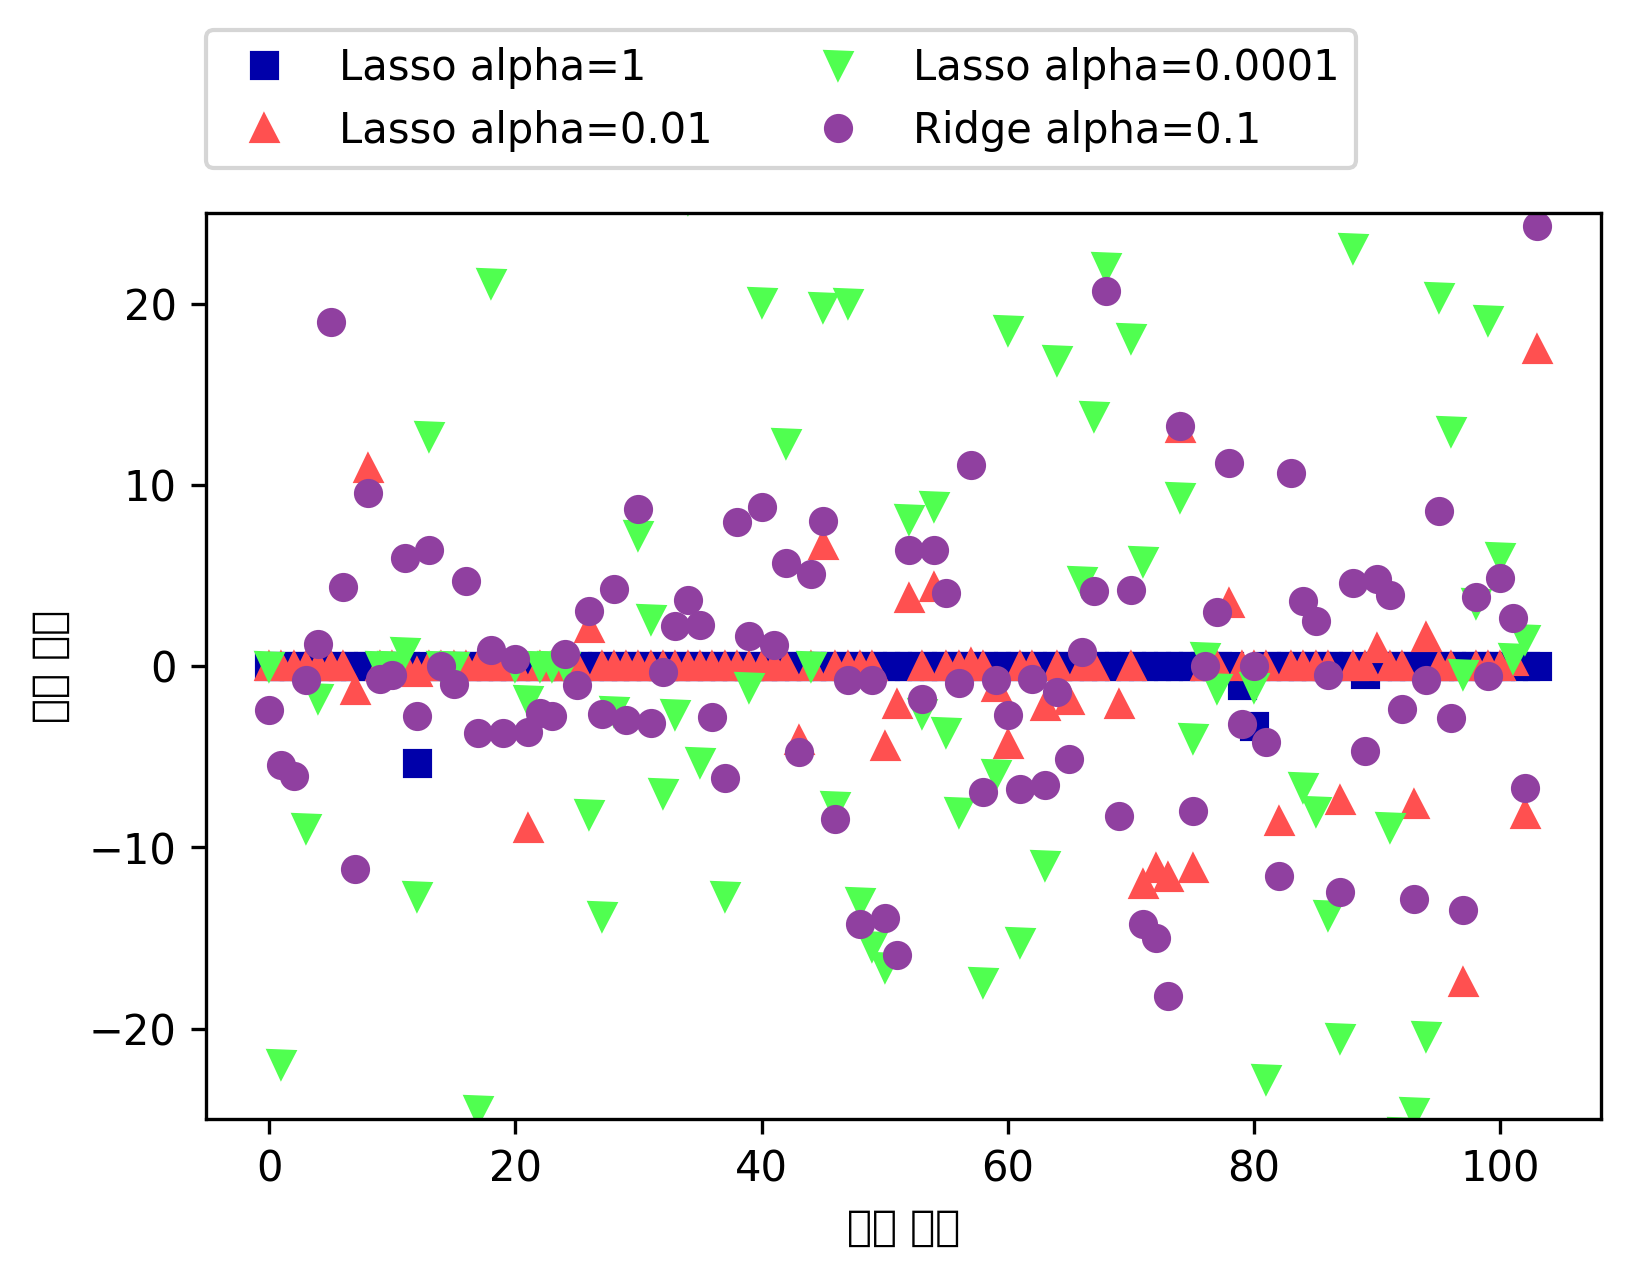

In [30]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

### 분류용 선형 모델

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

Data shape: (26, 2)
Target shape: (26,)


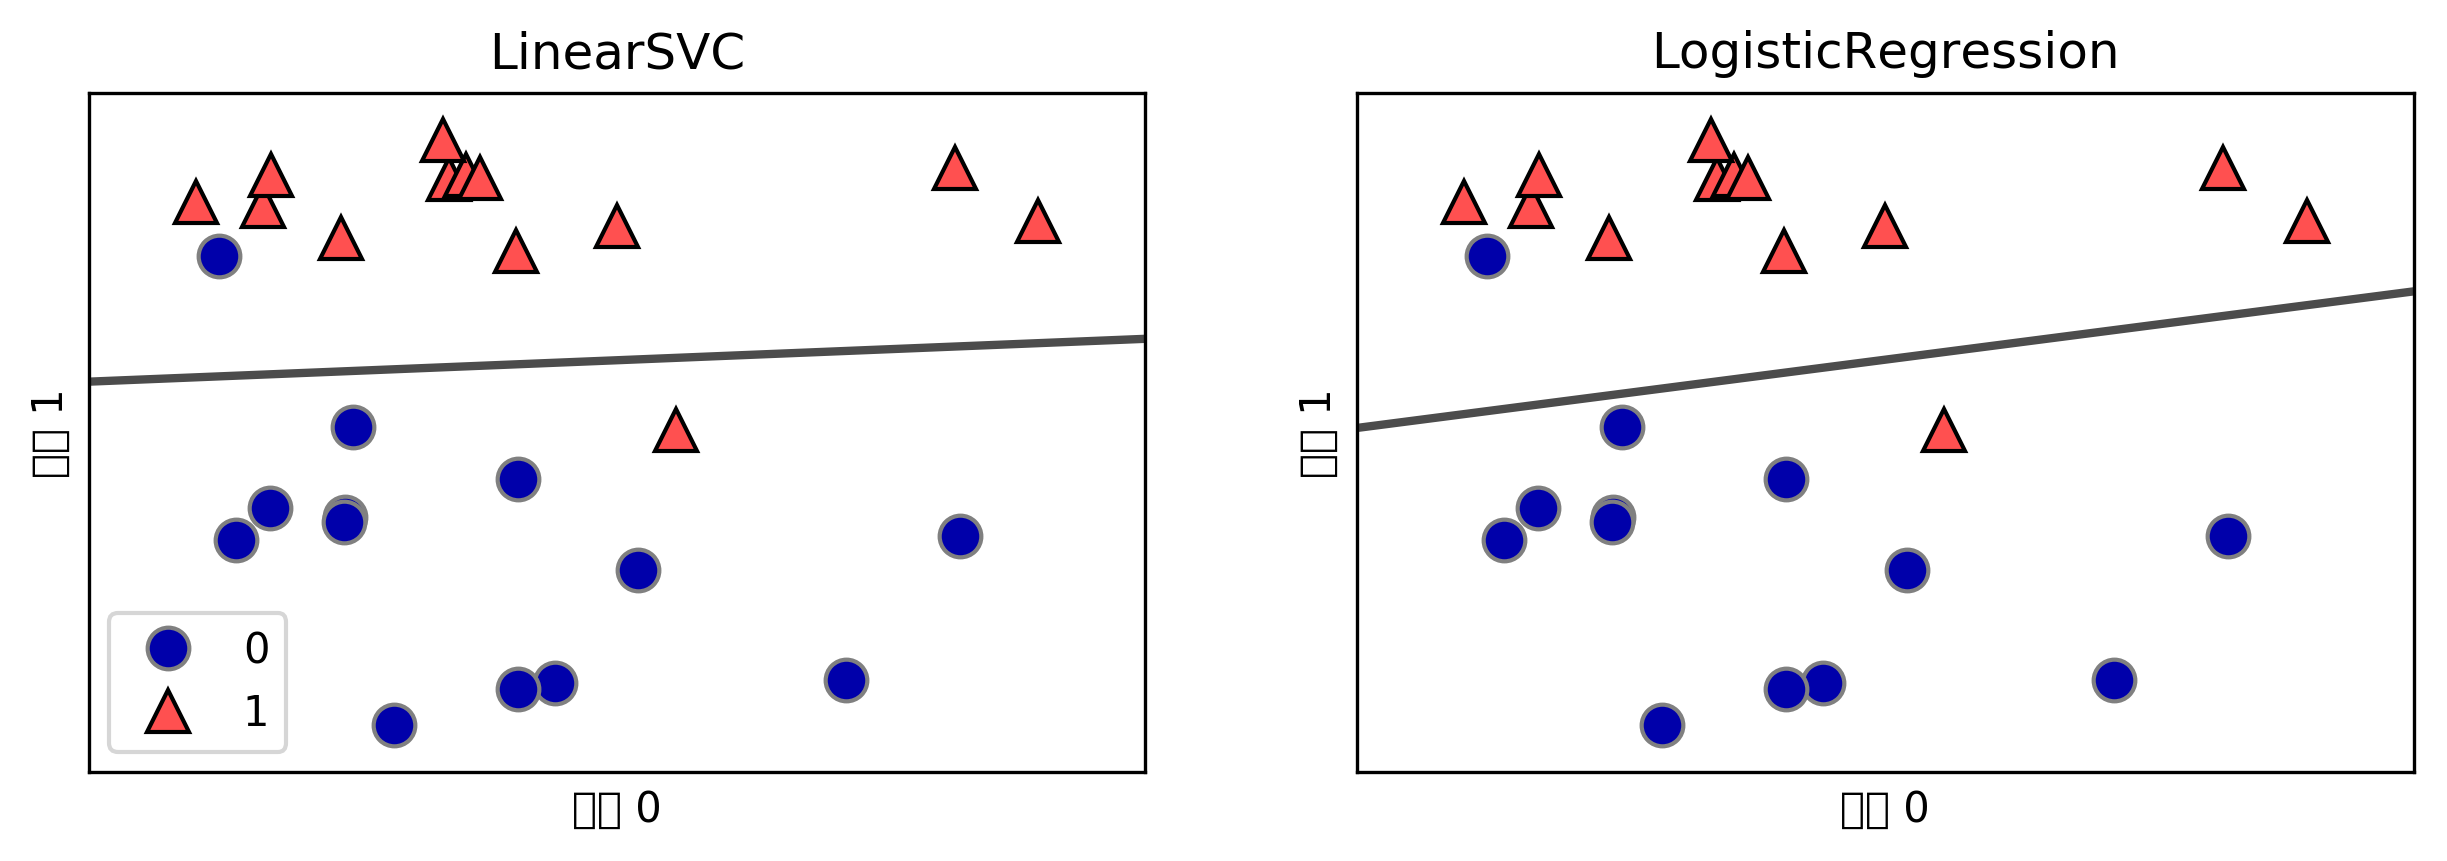

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특징 0")
    ax.set_ylabel("특징 1")
axes[0].legend()

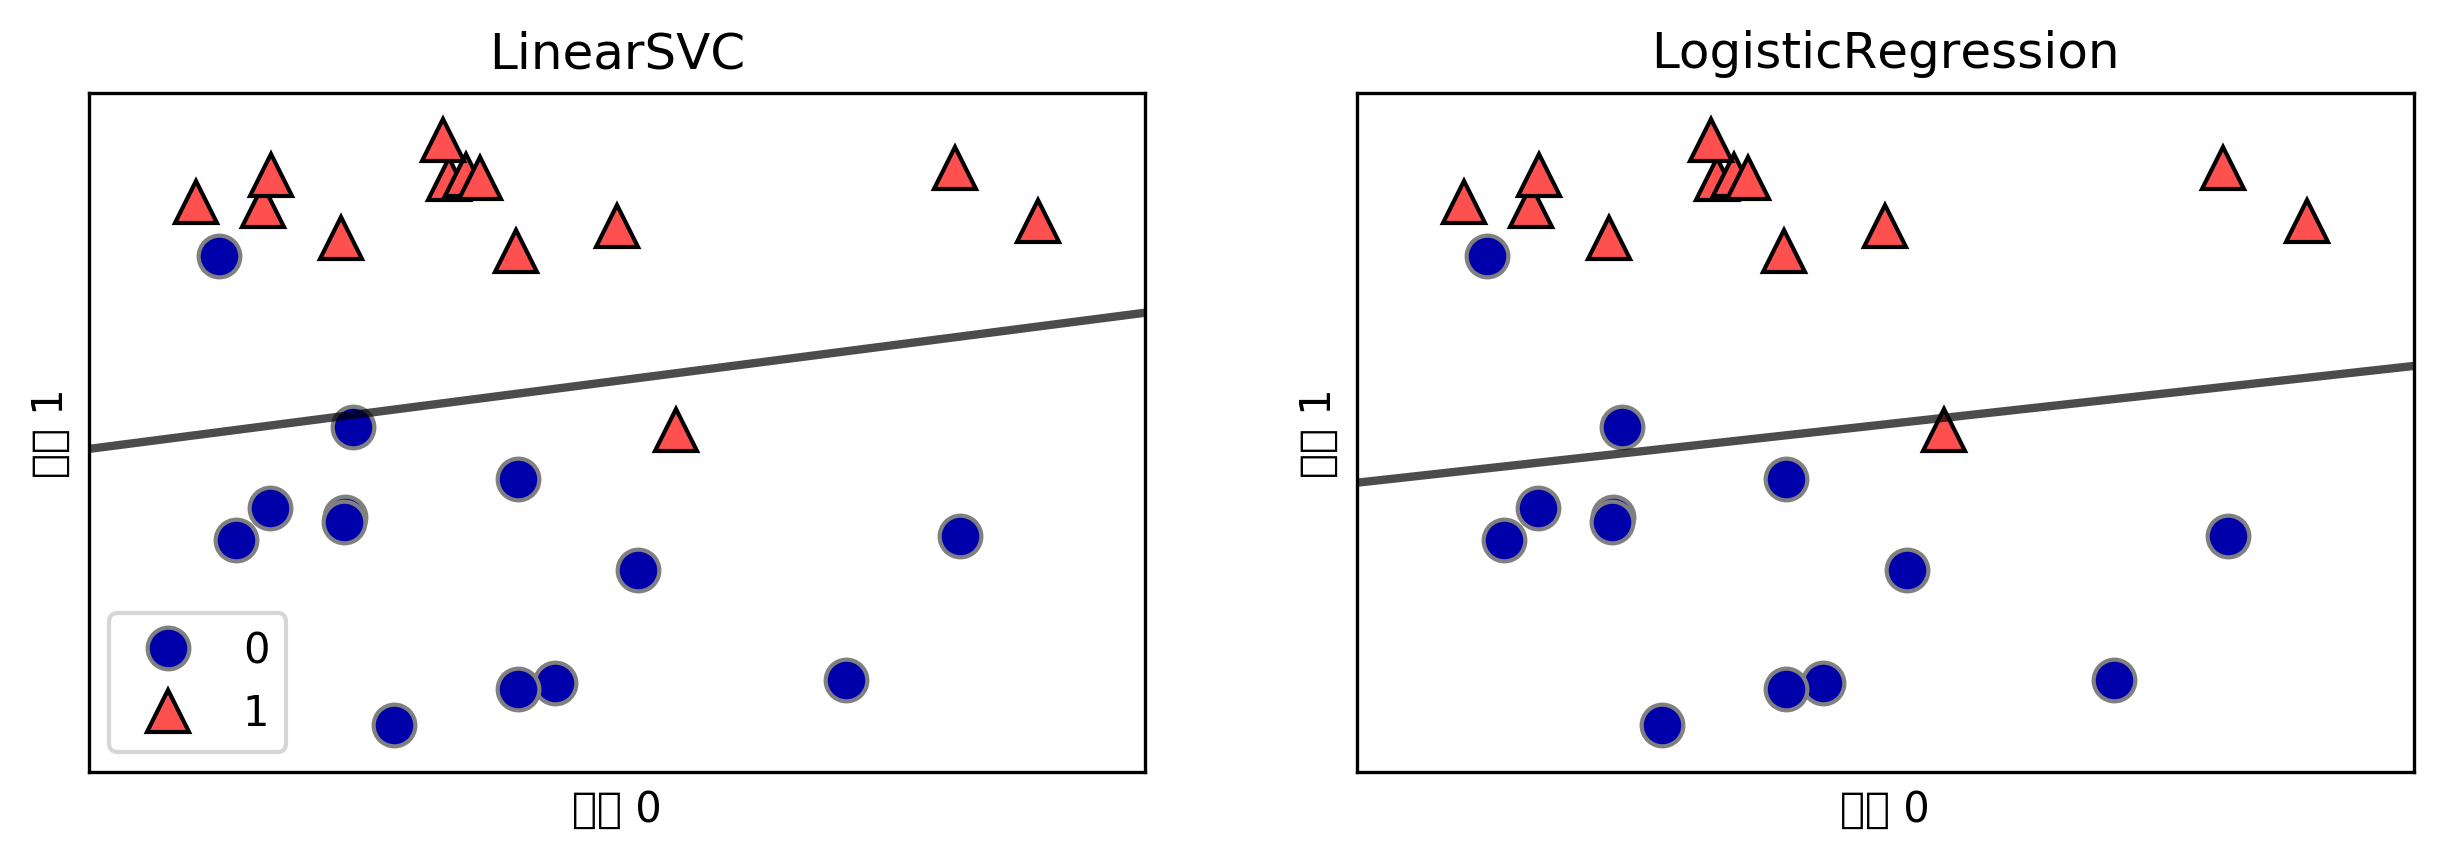

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(C=0.01), LogisticRegression(C=0.01)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특징 0")
    ax.set_ylabel("특징 1")
axes[0].legend()

In [34]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))

print()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("트레이닝 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

Shape of cancer data: (569, 30)

트레이닝 세트 점수: 0.955
테스트 세트 점수: 0.958


In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("트레이닝 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

트레이닝 세트 점수: 0.972
테스트 세트 점수: 0.965


In [36]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("트레이닝 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

트레이닝 세트 점수: 0.934
테스트 세트 점수: 0.930


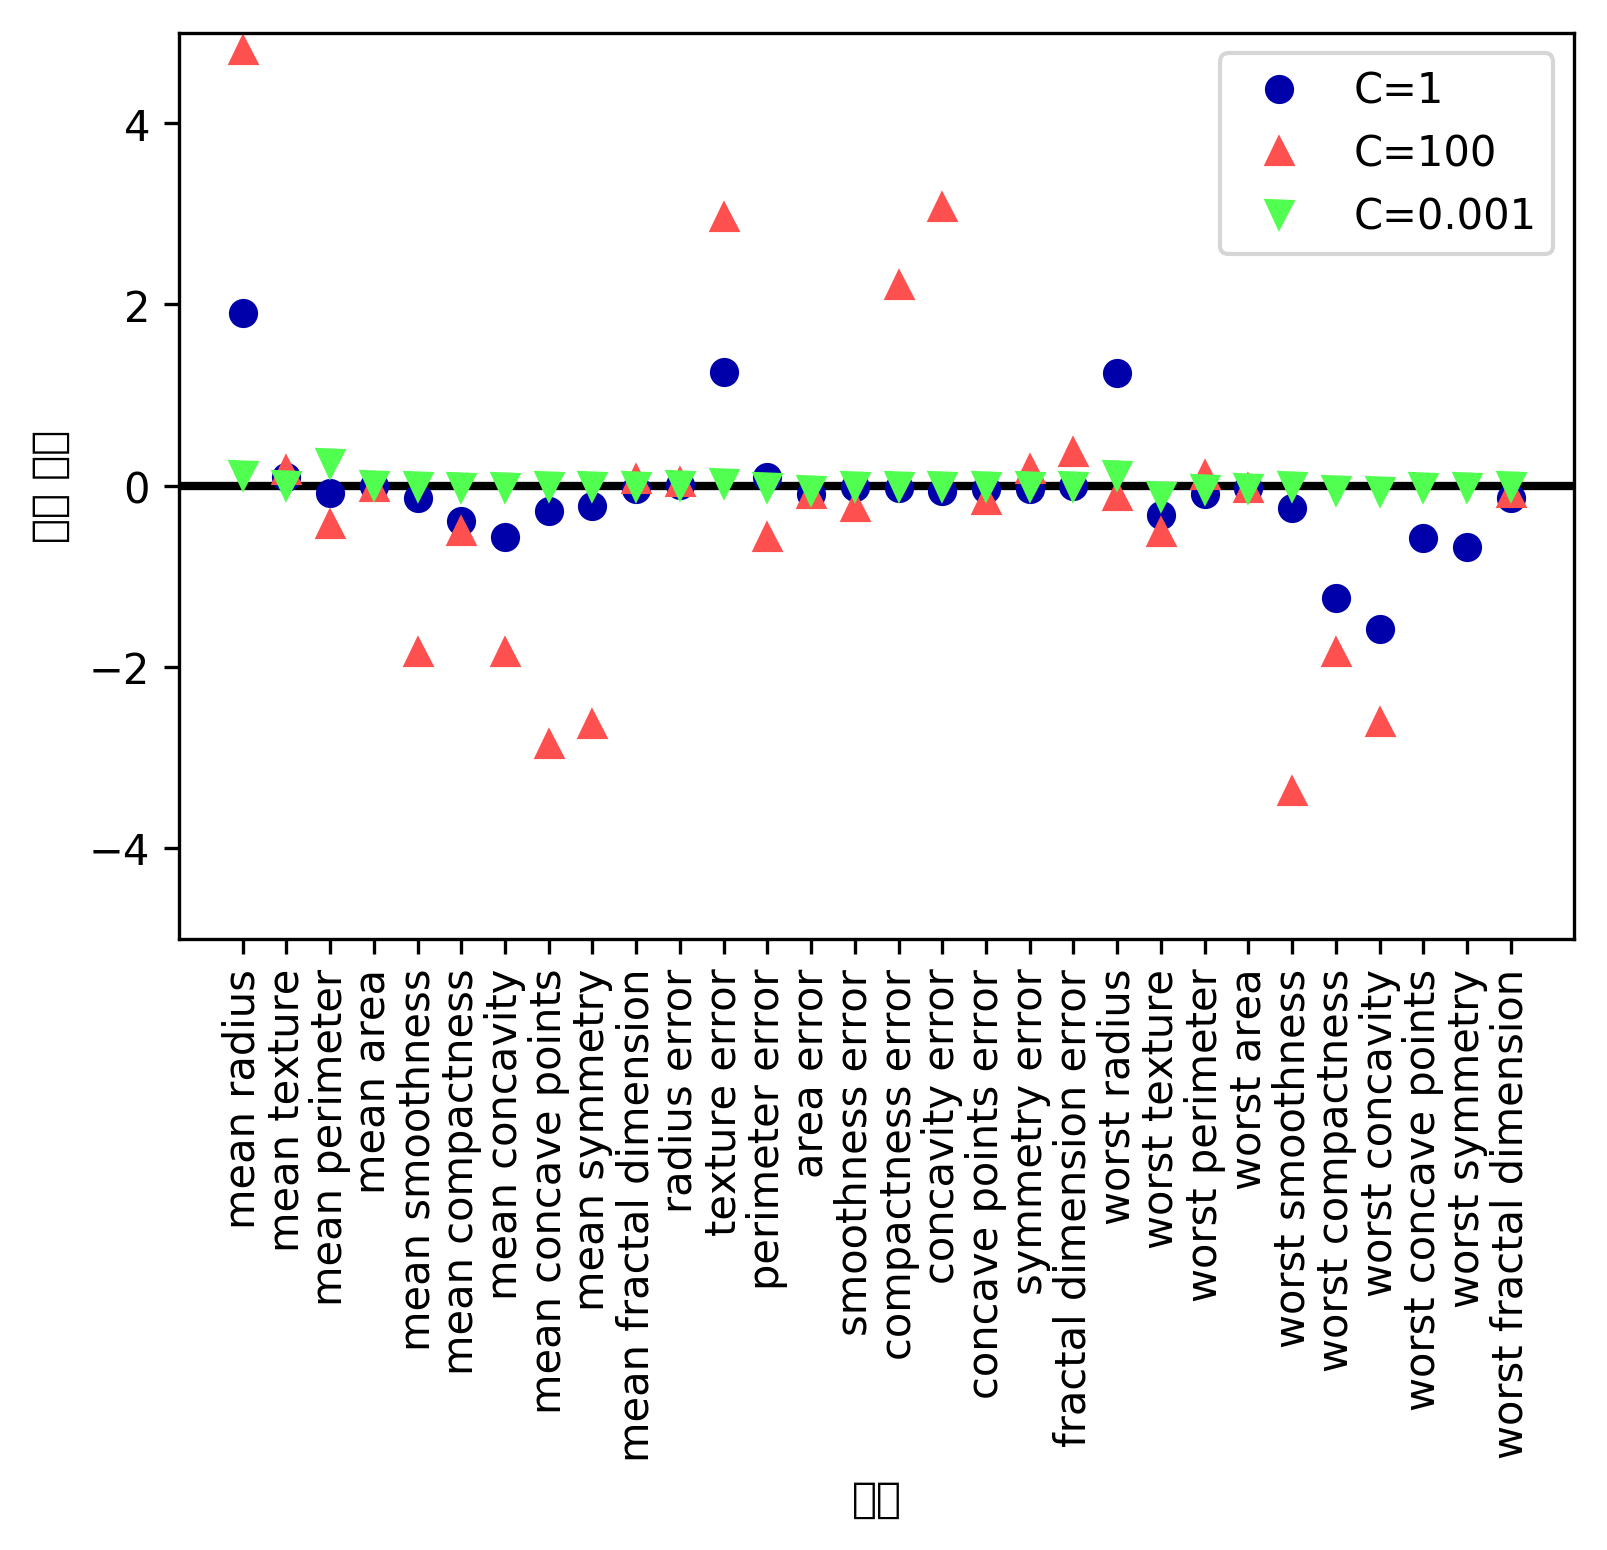

In [37]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특징")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 L1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 L1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 L1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 L1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.98


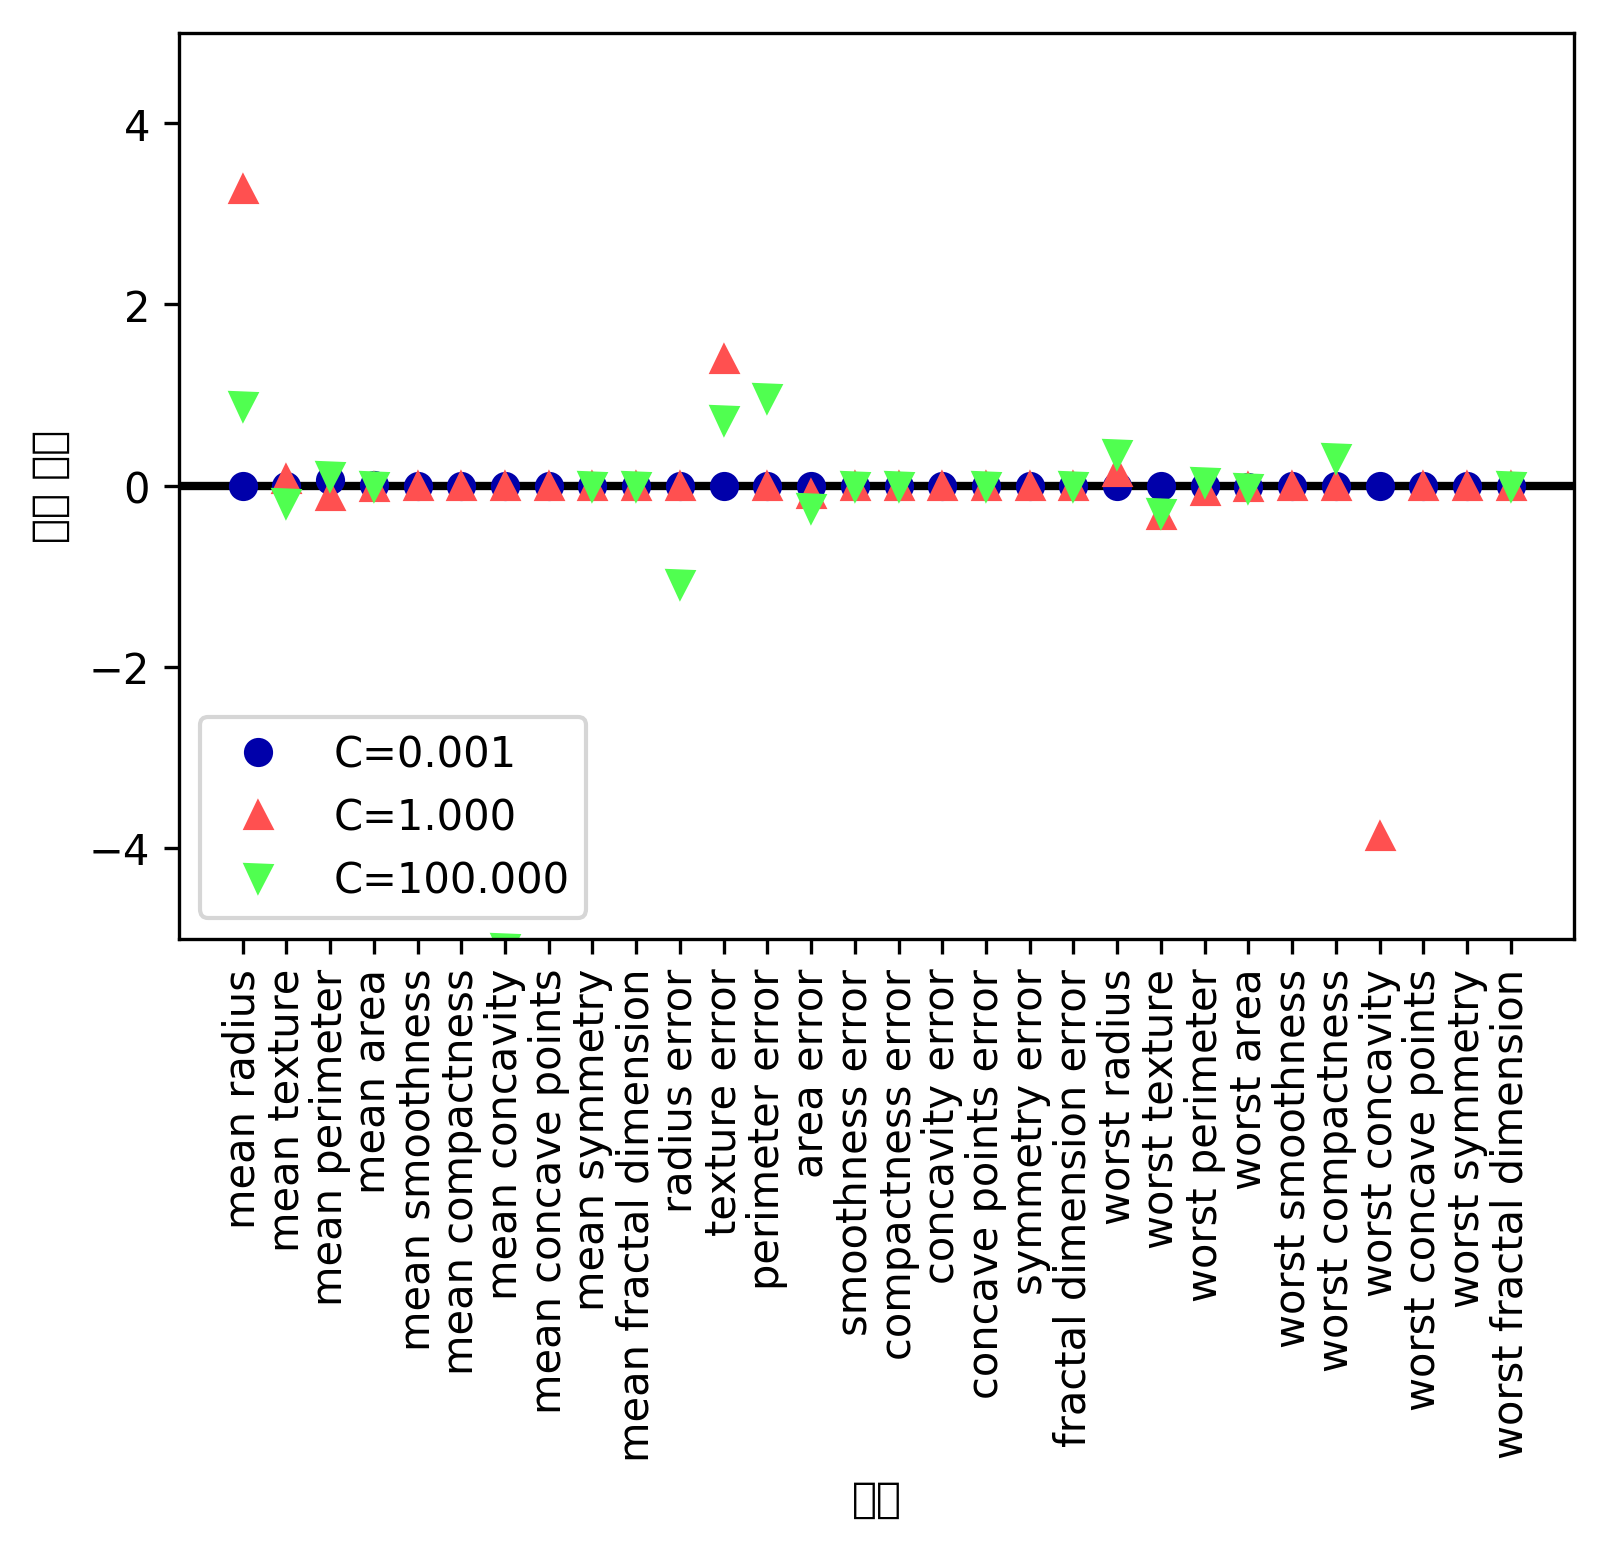

In [40]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 L1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 L1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특징")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델

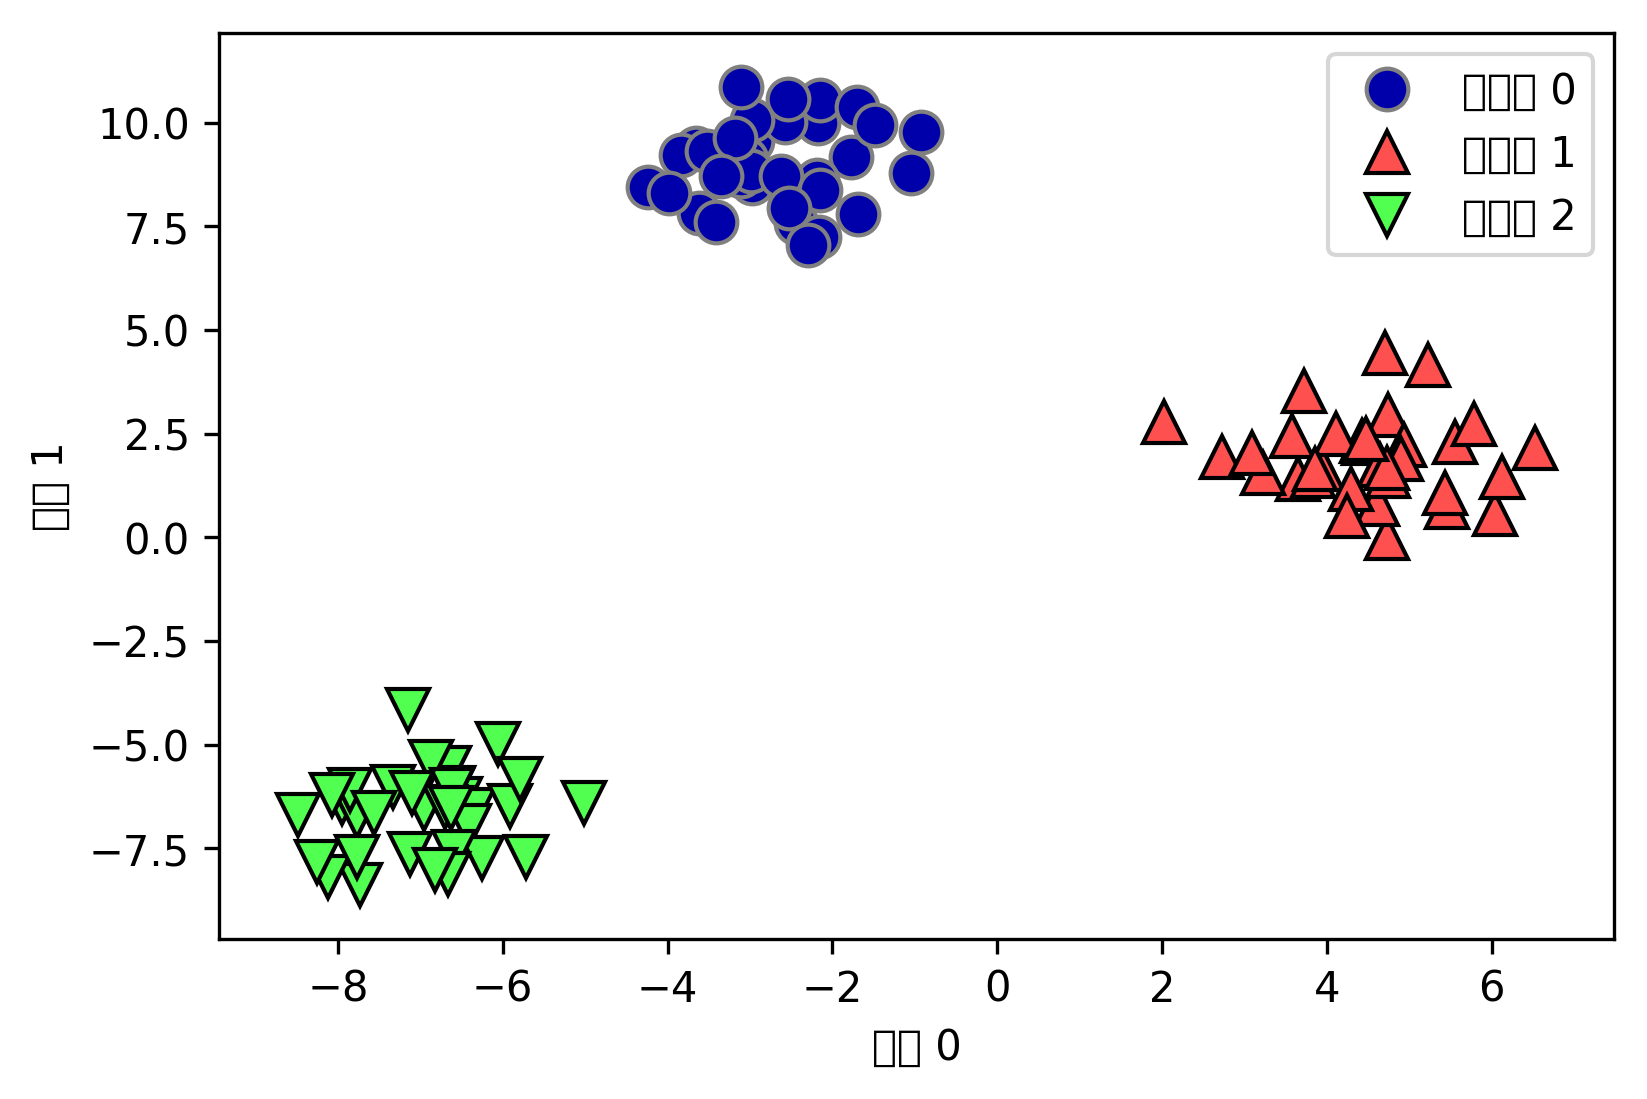

In [41]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)


mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특징 0")
plt.ylabel("특징 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [42]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열 크기: ", linear_svm.coef_.shape)
print("절편 배열 크기: ", linear_svm.intercept_.shape)

계수 배열 크기:  (3, 2)
절편 배열 크기:  (3,)


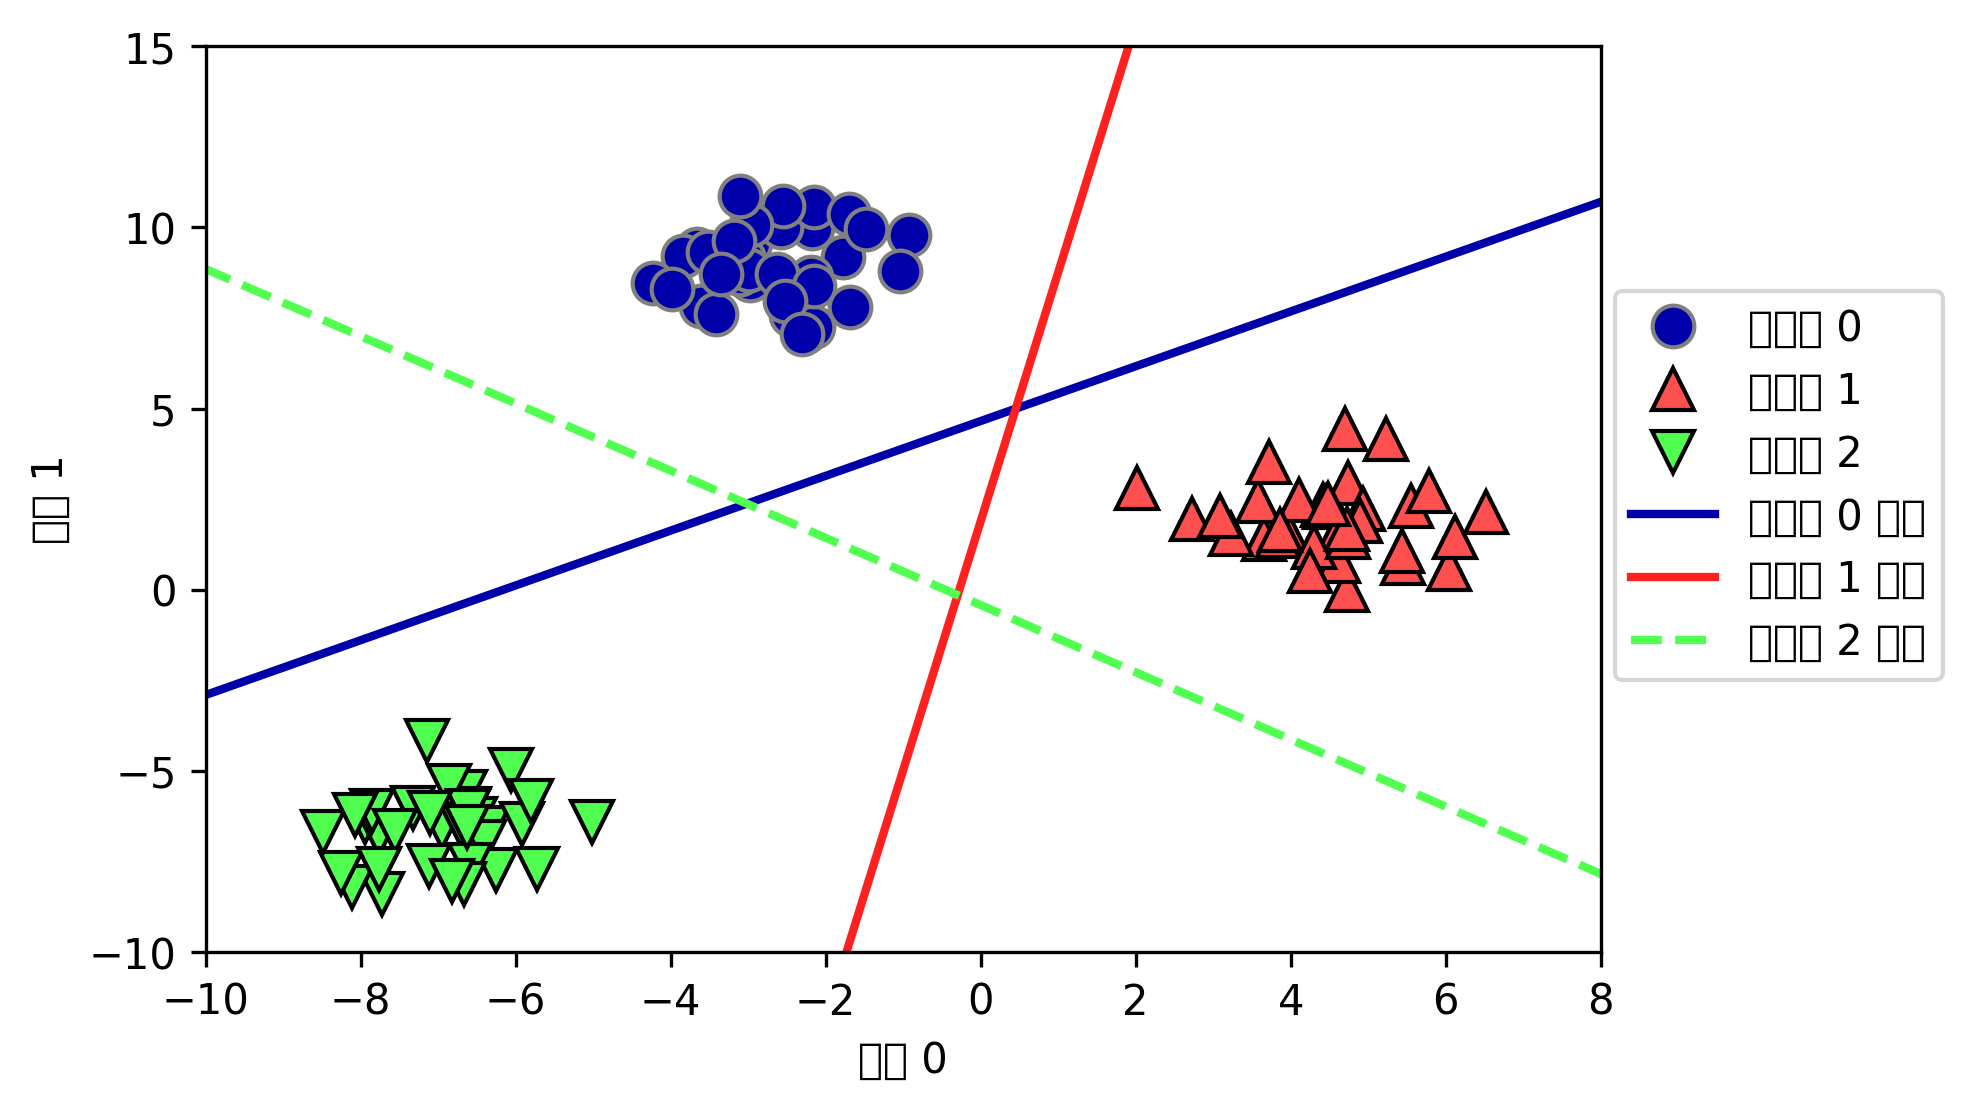

In [43]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특징 0")
plt.ylabel("특징 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

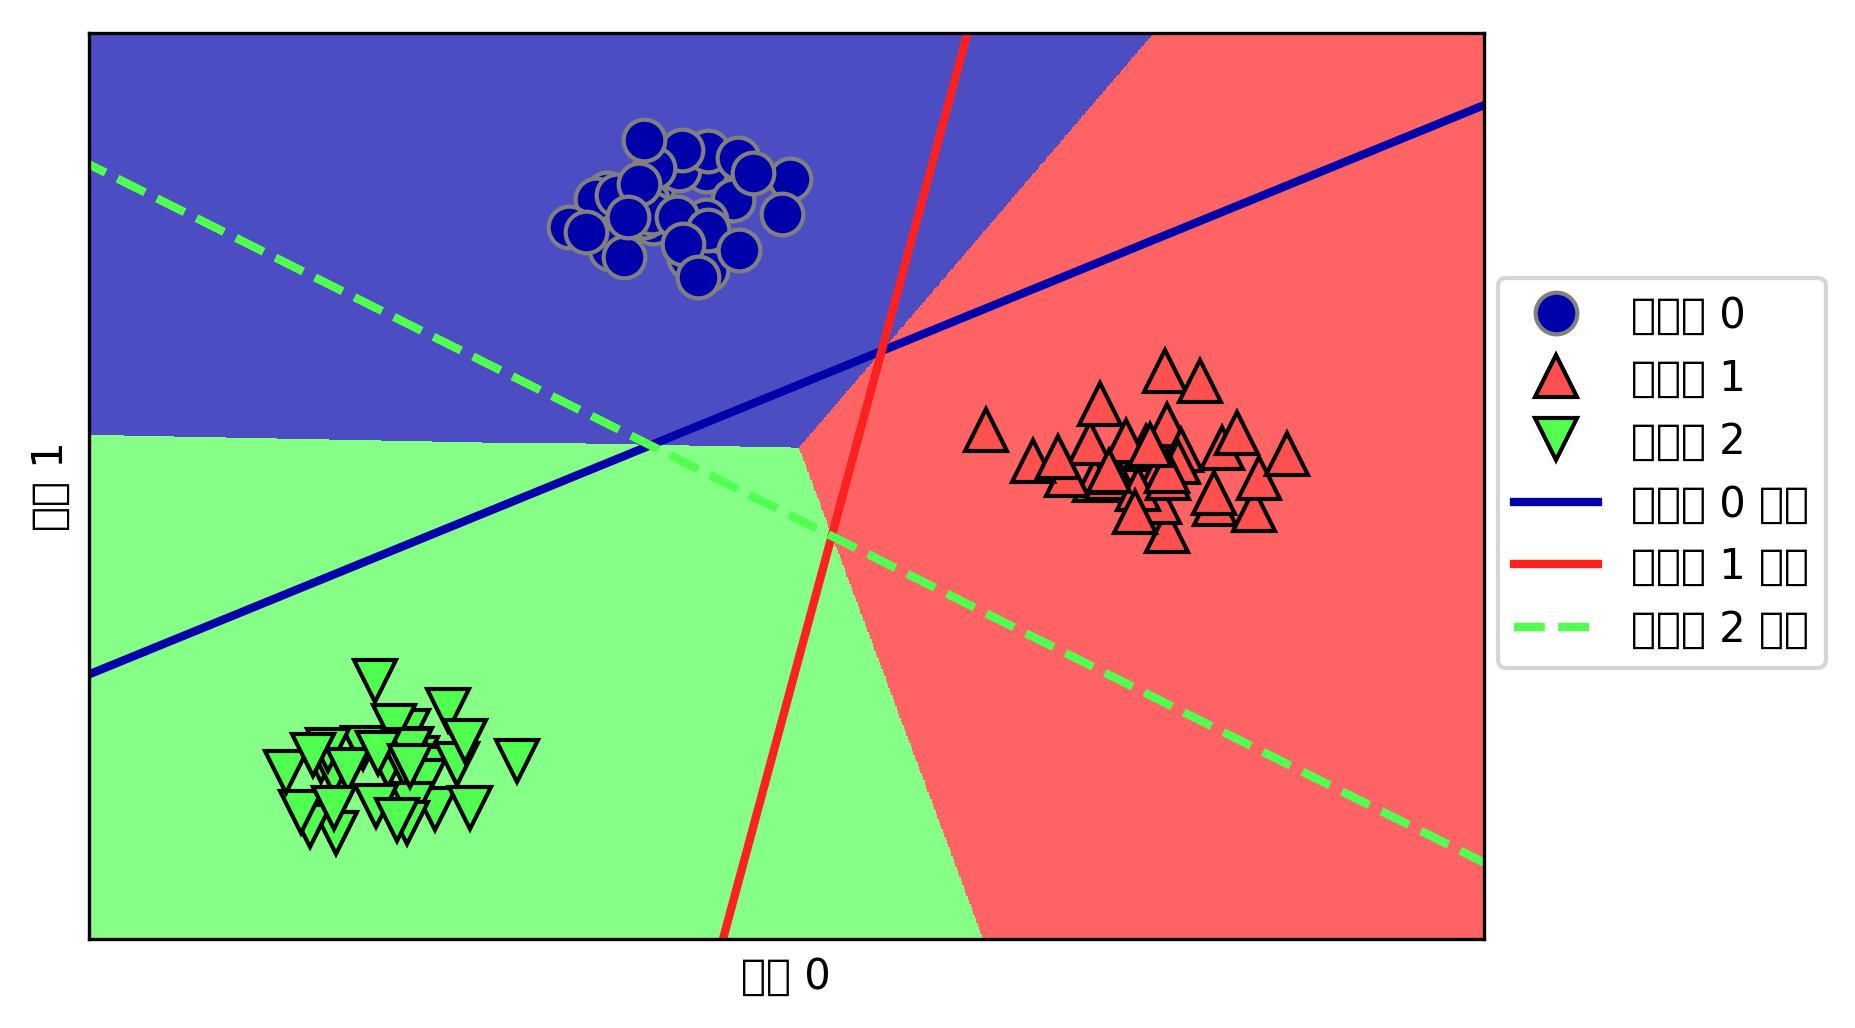

In [44]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특징 0")
plt.ylabel("특징 1")

### 장단점과 매개변수
#### 메서드 연결


In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
logreg = LogisticRegression().fit(X_train, y_train)

In [47]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [48]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)